In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler
%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf


In [2]:
lin_reg = joblib.load("linear_regressor.pkl")
poly_lin_reg = joblib.load("poly_lin_reg.pkl")
poly_sgd_reg = joblib.load("sgd_reg.pkl")
poly_ridge_reg = joblib.load("poly_ridge_reg.pkl")
poly_lasso_reg = joblib.load("poly_lasso_reg.pkl")
poly_elastic_net = joblib.load("poly_elastic_reg.pkl")

In [3]:
totaldf.insert(5,'lin μ', totaldf.μob*(np.exp(np.power(lin_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(6,'poly lin μ', totaldf.μob*(np.exp(np.power(poly_lin_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(7,'poly sgd μ', totaldf.μob*(np.exp(np.power(poly_sgd_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(8,'poly ridge μ', totaldf.μob*(np.exp(np.power(poly_ridge_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(9,'poly lasso μ', totaldf.μob*(np.exp(np.power(poly_lasso_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(10,'poly elastic μ', totaldf.μob*(np.exp(np.power(poly_elastic_net.predict(X_features_poly[2]),2)) -0.0012))



In [4]:
totaldf

,Pb,P,ΔP,μob,μ,lin μ,poly lin μ,poly sgd μ,poly ridge μ,poly lasso μ,poly elastic μ
0,2200.290403,2200.290403,0.000000,0.998694,0.998694,0.998885,0.998484,0.999894,0.998247,0.998734,0.998253
1,2200.290403,2348.433431,148.143028,0.998694,1.007933,1.016350,1.011671,1.016850,1.014792,1.016374,1.015808
2,2200.290403,2496.576459,296.286056,0.998694,1.017506,1.029580,1.023319,1.029233,1.027486,1.029808,1.029586
3,2200.290403,2644.719487,444.429084,0.998694,1.027358,1.042195,1.034989,1.041079,1.039522,1.042594,1.042676
4,2200.290403,2792.862515,592.572112,0.998694,1.037444,1.054536,1.046615,1.052738,1.051225,1.055079,1.055403
...,...,...,...,...,...,...,...,...,...,...,...
15,3910.215923,5560.049012,1649.833090,0.125504,0.155127,0.139131,0.145771,0.140001,0.143068,0.139447,0.139646
16,3910.215923,5670.037885,1759.821962,0.125504,0.157137,0.139978,0.147013,0.140916,0.144196,0.140301,0.140476
17,3910.215923,5780.026758,1869.810835,0.125504,0.159150,0.140827,0.148258,0.141835,0.145326,0.141155,0.141300
18,3910.215923,5890.015630,1979.799708,0.125504,0.161165,0.141677,0.149505,0.142759,0.146458,0.142009,0.142120


In [27]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(6):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Linear Regression ','Polynomial Regression ','Gradient Descent','Ridge Regression','Lasso Regression','Elastic Net'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear Regression,-0.431024,5.084947,3.254655,3.930609
Polynomial Regression,0.088496,5.263087,3.212809,4.169626
Gradient Descent,-0.674503,5.316538,3.368462,4.168212
Ridge Regression,-0.124929,4.901567,3.040144,3.846881
Lasso Regression,-0.442561,5.098857,3.269177,3.937853
Elastic Net,-0.409162,5.079273,3.259060,3.917264


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-0.010146,4.175854,2.780403,4.387204
polynomial linear,0.571232,3.476309,2.378217,3.935602
polynomial sgd,0.231359,4.040290,2.702571,4.370220
polynomial ridge regression,0.367519,3.629712,2.456069,4.005976
polynomial lasso regression,0.067856,4.169571,2.794371,4.406109
polynomial elastic net,0.055252,4.206232,2.808908,4.397666


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-0.138648,6.261459,3.812954,82.927551
polynomial linear,-2.222991,6.438343,4.305661,92.727100
polynomial sgd,-0.647819,6.393068,3.934690,86.294231
polynomial ridge regression,-1.525137,6.205274,3.960237,87.638126
polynomial lasso regression,-0.222809,6.210132,3.784616,82.834618
polynomial elastic net,-0.201827,6.234291,3.795485,83.081796


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-0.813761,5.051854,3.214319,140.617979
polynomial linear,-0.267696,5.686973,3.898643,163.220176
polynomial sgd,-2.280251,5.062011,3.337800,157.830391
polynomial ridge regression,-0.830738,5.242702,3.331466,150.695592
polynomial lasso regression,-1.028126,5.023108,3.167452,142.989729
polynomial elastic net,-0.902895,5.030278,3.182033,140.512298


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-7.067749,5.172080,7.071033,1232.902832
polynomial linear,6.570538,9.463314,7.516615,1839.597090
polynomial sgd,-9.828053,5.871428,9.840068,1526.433384
polynomial ridge regression,2.137365,8.441642,5.666336,1408.330701
polynomial lasso regression,-7.471791,5.299639,7.472186,1282.096219
polynomial elastic net,-6.938482,5.002628,6.939394,1193.733993


In [10]:
def UndersatErrorPlot(a):
    models = ['linear ','polynomial linear ','polynomial sgd','polynomial ridge regression','polynomial lasso regression','polynomial elastic net']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+5]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.ylabel
    plt.figure(figsize=(12,8))
    



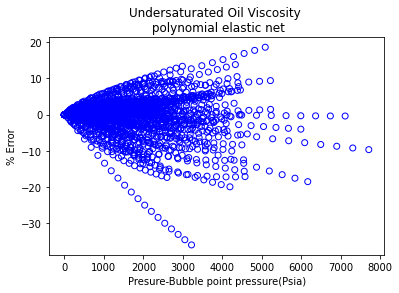

<Figure size 864x576 with 0 Axes>

In [11]:
UndersatErrorPlot('polynomial elastic net')

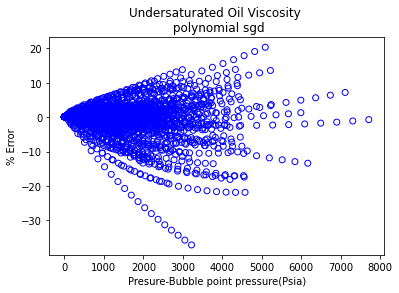

<Figure size 864x576 with 0 Axes>

In [12]:
UndersatErrorPlot('polynomial sgd')

In [13]:
def UndersatViscPlot(a):
    models = ['linear ','polynomial linear ','polynomial sgd','polynomial ridge regression','polynomial lasso regression','polynomial elastic net']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+5],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')
    

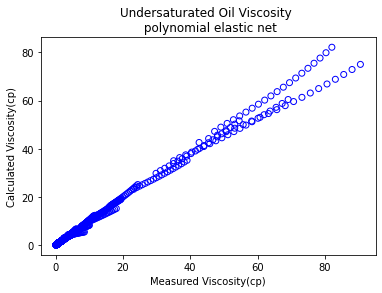

In [14]:
UndersatViscPlot('polynomial elastic net')

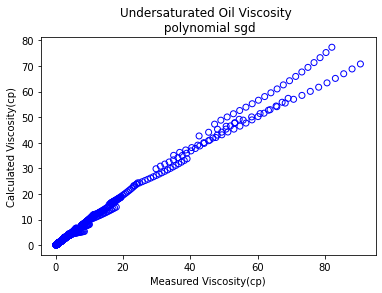

In [15]:
UndersatViscPlot('polynomial sgd')

Text(0, 0.5, '% Average Absolute Error')

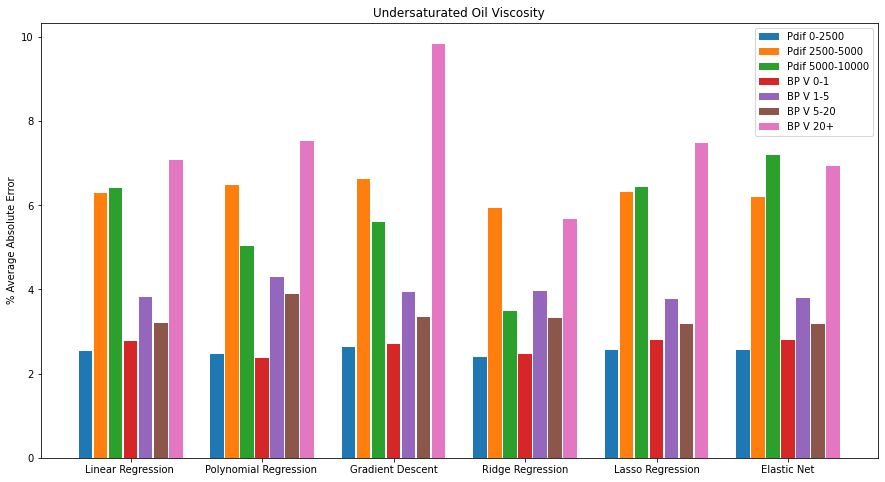

In [29]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =['Linear Regression ','Polynomial Regression ','Gradient Descent','Ridge Regression','Lasso Regression','Elastic Net']


%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(6), models)
plt.title('Undersaturated Oil Viscosity')
plt.ylabel("% Average Absolute Error")